In [1]:
import matplotlib.pyplot as mpl
import numpy as np
import pandas as pd
df = pd.read_csv(r'C:\Users\loren\Documents\GitHub\intro2ml_2021_final_project\Data\dataset_2k.csv')
print(df)

                       id language  retweet        date      time  \
0     1485744412172950000       en    False  24/01/2022  23:40:46   
1     1485721208616270000       en    False  24/01/2022  22:08:34   
2     1485712796457340000       en    False  24/01/2022  21:35:08   
3     1485696815081160000       en    False  24/01/2022  20:31:38   
4     1485676215142920000       en    False  24/01/2022  19:09:46   
...                   ...      ...      ...         ...       ...   
1995   576616860638158000       en    False  14/03/2015  06:32:27   
1996   576378534635155000       en    False  13/03/2015  14:45:25   
1997   576323800913997000       en    False  13/03/2015  11:07:56   
1998   576027220013031000       en    False  12/03/2015  15:29:25   
1999   576003023455068000       en    False  12/03/2015  13:53:17   

                                                  tweet  \
0     just sliced an acorn squash and it wasnt even ...   
1     Acorn squash, lacinato kale, parsnip and duck .

In [2]:
texts = df["tweet"]
lunghezze = [0 for x in texts]
for i in range(len(texts)):
    lunghezze[i]=len(texts[i])

(array([ 12.,  37.,  46.,  79., 111.,  98., 112.,  86.,  88., 100.,  91.,
         99.,  95., 106.,  46.,  58.,  56.,  43.,  54.,  39.,  37.,  45.,
         37.,  75.,  69.,  66.,  87.,  30.,  84.,  14.]),
 array([  4.        ,  14.43333333,  24.86666667,  35.3       ,
         45.73333333,  56.16666667,  66.6       ,  77.03333333,
         87.46666667,  97.9       , 108.33333333, 118.76666667,
        129.2       , 139.63333333, 150.06666667, 160.5       ,
        170.93333333, 181.36666667, 191.8       , 202.23333333,
        212.66666667, 223.1       , 233.53333333, 243.96666667,
        254.4       , 264.83333333, 275.26666667, 285.7       ,
        296.13333333, 306.56666667, 317.        ]),
 <BarContainer object of 30 artists>)

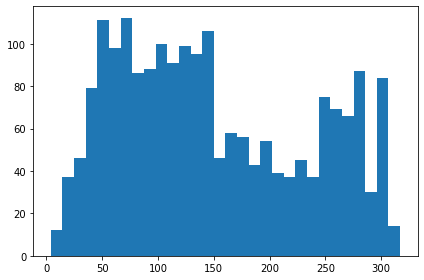

In [3]:
n_bins=30
fig, axs = mpl.subplots(1, 1, sharey=True, tight_layout=True)
axs.hist(lunghezze, bins=n_bins)

In [4]:
rt = df["retweets_count"]
retweets = [np.int64(0) for x in rt]
for i in range(len(rt)):
    retweets[i] = rt[i]

(array([1.89e+03, 5.70e+01, 2.40e+01, 1.40e+01, 6.00e+00, 4.00e+00,
        0.00e+00, 0.00e+00, 1.00e+00, 1.00e+00, 0.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([     0.        ,  10750.26666667,  21500.53333333,  32250.8       ,
         43001.06666667,  53751.33333333,  64501.6       ,  75251.86666667,
         86002.13333333,  96752.4       , 107502.66666667, 118252.93333333,
        129003.2       , 139753.46666667, 150503.73333333, 161254.        ,
        172004.26666667, 182754.53333333, 193504.8       , 204255.06666667,
        215005.33333333, 225755.6       , 236505.86666667, 247256.13333333,
        258006.4       , 268756.66666667, 279506.93333333, 290257.2       ,
        301007.46666667, 311757.73333333, 322508.        ]),
 <BarContainer object of 30 artists>)

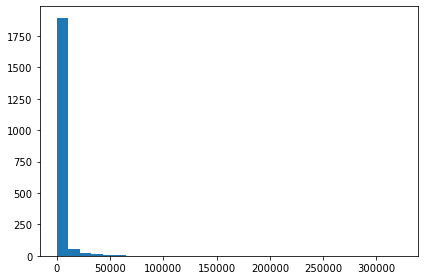

In [5]:
n_bins=30
fig, axs = mpl.subplots(1, 1, sharey=True, tight_layout=True)
axs.hist(retweets, bins=n_bins)

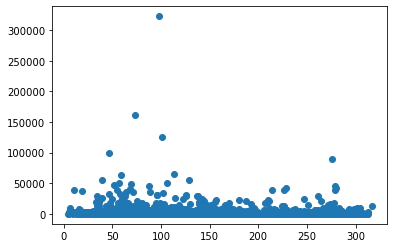

In [6]:
mpl.scatter(lunghezze,retweets)

In [7]:
popular = np.zeros((len(lunghezze),1),dtype=np.int32)
for i in range(len(lunghezze)):
    if retweets[i]>=1000:
        popular[i]=1
print(popular)
type(popular)

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


numpy.ndarray

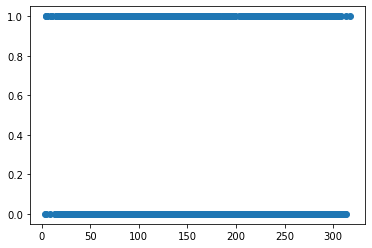

In [8]:
mpl.scatter(lunghezze,popular)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression

In [10]:
lung2D = np.zeros((len(lunghezze),2),dtype=np.int32)
for i in range(len(lunghezze)):
    lung2D[i][0]=lunghezze[i]

In [11]:
print(min(lunghezze))
print(max(lunghezze))
print(min(retweets))
print(max(retweets))

regr = RandomForestClassifier(n_estimators=1000,max_depth=20, random_state=0)
regr.fit(lung2D,popular.ravel())

4
317
0
322508


RandomForestClassifier(max_depth=20, n_estimators=1000, random_state=0)

In [12]:
regr.predict([[70,0]])[0]

1

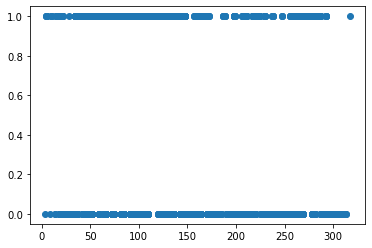

In [13]:
predpoints = np.zeros((len(lunghezze),1),dtype=np.int32)
for i in range(len(lunghezze)):
    predpoints[i] = regr.predict([[lunghezze[i],0]])[0]
mpl.scatter(lunghezze,predpoints)

[0]
622
0.311


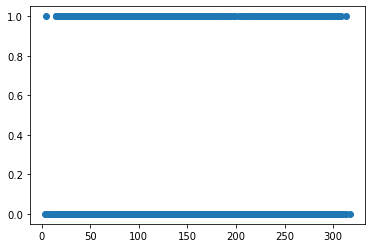

In [14]:
errori = np.zeros((len(lunghezze),1),dtype=np.int32)
count=0
for i in range(len(lunghezze)):
    errori[i]=abs(popular[i]-predpoints[i])
    if(errori[i]==1):
        count+=1 
mpl.scatter(lunghezze,errori)
print(errori[0])
print(count)
print(count/len(lunghezze))

[0]
292
0.292


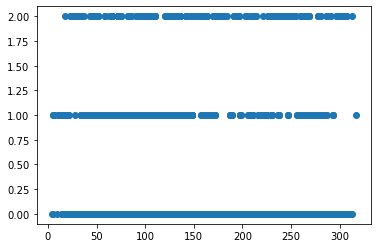

In [15]:
erroripop = np.zeros((len(lunghezze),1),dtype=np.int32)
count=0
for i in range(len(lunghezze)):
    if(popular[i]==1):
        erroripop[i]=abs(popular[i]-predpoints[i])+1
        if(erroripop[i]==2):
            count+=1
print(erroripop[0])
print(count)
print(count/1000)
mpl.scatter(lunghezze,erroripop)

[1]
330
0.33


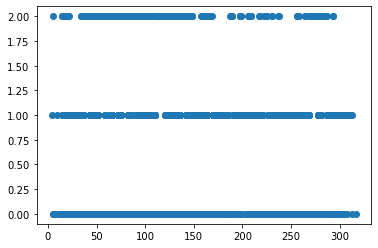

In [16]:
errorinpop = np.zeros((len(lunghezze),1),dtype=np.int32)
count=0
for i in range(len(lunghezze)):
    if(popular[i]==0):
        errorinpop[i]=abs(popular[i]-predpoints[i])+1
        if(errorinpop[i]==2):
            count+=1
print(errorinpop[0])
print(count)
print(count/1000)
mpl.scatter(lunghezze,errorinpop)

##############################################################################################################################################################
E' DUNQUE DA NOTARE CHE LA RANDOM FOREST  USANDO COME UNICO PREDITTORE LA LUNGHEZZA HA UN ERRORE DEL 30% C.A. NELLE PREDIZIONI CON UNA LEGGERISSIMA TENDENZA A FAVORIRE I FALSI NON POPOLARI RISPETTO A I FALSI POPOLARI. ALL'AUMENTARE DEL NUMERO DI ALBERI L'ERRORE INIZIA FLUTTUARE LOCALMENTE MA SEMPRE INTORNO AL 30% CON TALVOLTA
MIGLIORAMENTI NEI FALSI POPOLARI O NEI FALSI NON POPOLARI.
##############################################################################################################################################################

In [17]:
photos = df["photos"]

In [18]:
photos[0]

'[]'

In [19]:
numphoto = np.zeros((len(photos),1),dtype=np.int32)
for i in range(len(photos)):
    if(photos[i]!=photos[0]):
        numphoto[i]=len(photos[i].split(','))

In [20]:
X = np.zeros((len(lunghezze),2),dtype=np.int32)
for i in range(len(lunghezze)):
    X[i][0]=lunghezze[i]
    X[i][1]=numphoto[i]
print(X)

[[ 85   0]
 [160   0]
 [126   0]
 ...
 [ 27   0]
 [ 29   0]
 [ 57   1]]


In [21]:
regr = RandomForestClassifier(n_estimators=500,max_depth=20, random_state=0)
regr.fit(X,popular.ravel())

RandomForestClassifier(max_depth=20, n_estimators=500, random_state=0)

In [22]:
regr.predict([[70,1]])[0]

1

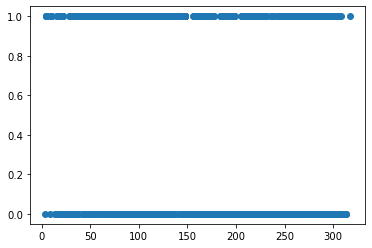

In [23]:
predpoints = np.zeros((len(lunghezze),1),dtype=np.int32)
for i in range(len(lunghezze)):
    predpoints[i] = regr.predict([[lunghezze[i],numphoto[i]]])[0]
mpl.scatter(lunghezze,predpoints)

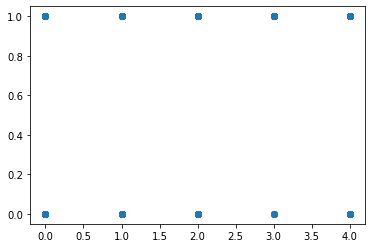

In [24]:
mpl.scatter(numphoto,predpoints)

[0]
495
0.2475


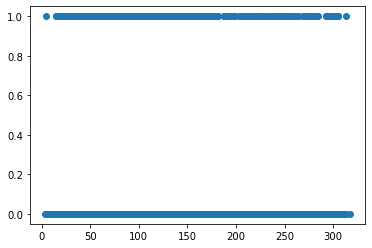

In [25]:
errori = np.zeros((len(lunghezze),1),dtype=np.int32)
count=0
for i in range(len(lunghezze)):
    errori[i]=abs(popular[i]-predpoints[i])
    if(errori[i]==1):
        count+=1 
mpl.scatter(lunghezze,errori)
print(errori[0])
print(count)
print(count/len(lunghezze))

[0]
244
0.244


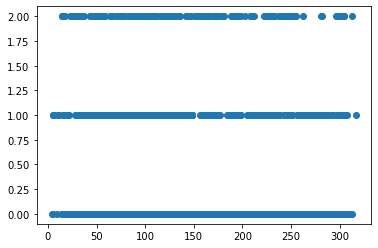

In [26]:
erroripop = np.zeros((len(lunghezze),1),dtype=np.int32)
count=0
for i in range(len(lunghezze)):
    if(popular[i]==1):
        erroripop[i]=abs(popular[i]-predpoints[i])+1
        if(erroripop[i]==2):
            count+=1
print(erroripop[0])
print(count)
print(count/1000)
mpl.scatter(lunghezze,erroripop)

[1]
251
0.251


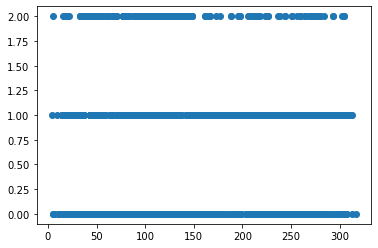

In [27]:
errorinpop = np.zeros((len(lunghezze),1),dtype=np.int32)
count=0
for i in range(len(lunghezze)):
    if(popular[i]==0):
        errorinpop[i]=abs(popular[i]-predpoints[i])+1
        if(errorinpop[i]==2):
            count+=1
print(errorinpop[0])
print(count)
print(count/1000)
mpl.scatter(lunghezze,errorinpop)

######################################################################################################################################################
IMPLEMENTANDO ANCHE IL NUMERO DI FOTO IL RISULTATO SEMBRA MIGLIORARE CON UN ERRORE DEL 25% CIRCA. ANCHE QUI I FALSI POPOLARI E I FALSI NON POPOLARI
COINCIDONO CIRCA IN NUMERO. DI NUOVO AL DI SOPRA DEI 250 PREDITTORI NON SEMBRANO ESSERCI GRANDI CAMBIAMENTI.
######################################################################################################################################################

In [28]:
ht = df["hashtags"]

In [29]:
nhash = np.zeros((len(ht),1),dtype=np.int32)
for i in range(len(ht)):
    if(ht[i]!=ht[0]):
        nhash[i]=len(ht[i].split(','))
print(nhash)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


################################### PROVA UTILIZZANDO SOLO HASHTAG E LUNGHEZZE ########################################################################

In [30]:
X = np.zeros((len(lunghezze),2),dtype=np.int32)
for i in range(len(lunghezze)):
    X[i][0]=lunghezze[i]
    X[i][1]=nhash[i]
print(X)

[[ 85   0]
 [160   0]
 [126   0]
 ...
 [ 27   0]
 [ 29   0]
 [ 57   0]]


######################################## PROVA UTILIZZANDO SOLO HASHTAG E NUMERO DI FOTO ###########################################################

In [31]:
X = np.zeros((len(lunghezze),2),dtype=np.int32)
for i in range(len(lunghezze)):
    X[i][0]=numphoto[i]
    X[i][1]=nhash[i]
print(X)

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 0]]


############################################ PROVA UTILIZZANDO TUTTI E TRE #########################################################################

In [32]:
X = np.zeros((len(lunghezze),3),dtype=np.int32)
for i in range(len(lunghezze)):
    X[i][0]=lunghezze[i]
    X[i][1]=nhash[i]
    X[i][2]=numphoto[i]
print(X)

[[ 85   0   0]
 [160   0   0]
 [126   0   0]
 ...
 [ 27   0   0]
 [ 29   0   0]
 [ 57   0   1]]


######################################## OUTPUT ##################################################################################################

In [33]:
regr = RandomForestClassifier(n_estimators=1000,max_depth=20, random_state=0)
regr.fit(X,popular.ravel())

RandomForestClassifier(max_depth=20, n_estimators=1000, random_state=0)

In [34]:
regr.predict([[70,1,1]])[0]

1

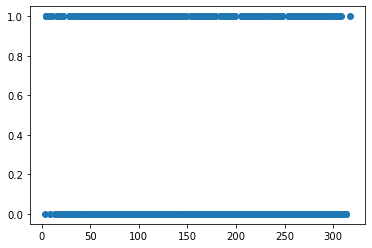

In [35]:
predpoints = np.zeros((len(lunghezze),1),dtype=np.int32)
for i in range(len(lunghezze)):
    predpoints[i] = regr.predict([[X[i][0],X[i][1],X[i][2]]])[0]
mpl.scatter(X[:,0],predpoints)

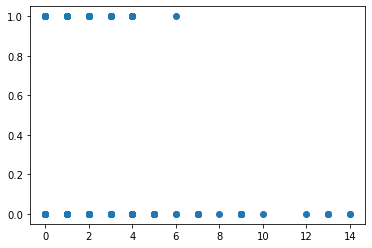

In [36]:
mpl.scatter(X[:,1],predpoints)

[0]
449
0.2245


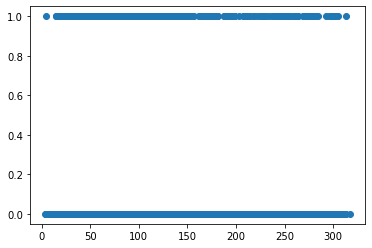

In [37]:
errori = np.zeros((len(lunghezze),1),dtype=np.int32)
count=0
for i in range(len(lunghezze)):
    errori[i]=abs(popular[i]-predpoints[i])
    if(errori[i]==1):
        count+=1 
mpl.scatter(X[:,0],errori)
print(errori[0])
print(count)
print(count/len(lunghezze))

[0]
221
0.221


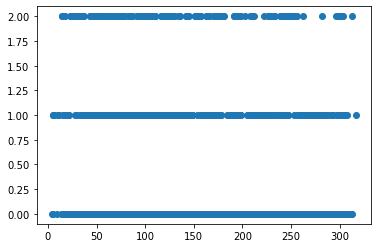

In [38]:
erroripop = np.zeros((len(lunghezze),1),dtype=np.int32)
count=0
for i in range(len(lunghezze)):
    if(popular[i]==1):
        erroripop[i]=abs(popular[i]-predpoints[i])+1
        if(erroripop[i]==2):
            count+=1
print(erroripop[0])
print(count)
print(count/1000)
mpl.scatter(X[:,0],erroripop)

[1]
228
0.228


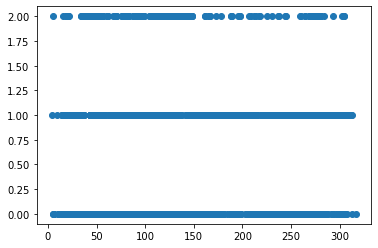

In [39]:
errorinpop = np.zeros((len(lunghezze),1),dtype=np.int32)
count=0
for i in range(len(lunghezze)):
    if(popular[i]==0):
        errorinpop[i]=abs(popular[i]-predpoints[i])+1
        if(errorinpop[i]==2):
            count+=1
print(errorinpop[0])
print(count)
print(count/1000)
mpl.scatter(X[:,0],errorinpop)

####################################################################################################################################################
RINCONTROLLARE I VALOR DEI FALSI PERCHE FORSE ALCUNI SONO INVERTITI

CASO1: Hashtag e Lunghezze. Errore del 28% c.a. con favoritismi verso i falsi popolari (33%) rispetto ai falsi non popolari (23%)
CASO2: Hashtag e Foto. Errore del 44% c.a. con falsi non popolari pari a 17% ma falsi popolari pari a 70%
CASO3: Lunghezze Hashtag e Foto: Errore del 22% c.a. con falsi non popolari pari a 21% c.a. e falsi popolari pari a 24% c.a.
####################################################################################################################################################

In [40]:
vt = df["video"]
nvideo = np.zeros((len(vt),1),dtype=np.int32)
for i in range(len(vt)):
    if(vt[i]!=ht[0]):
        nvideo[i]=vt[i]
print(nvideo)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [1]]


[[ 85   0   0   0]
 [160   0   0   0]
 [126   0   0   0]
 ...
 [ 27   0   0   0]
 [ 29   0   0   0]
 [ 57   0   1   1]]


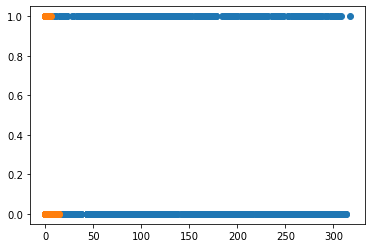

In [41]:
X = np.zeros((len(lunghezze),4),dtype=np.int32)
for i in range(len(lunghezze)):
    X[i][0]=lunghezze[i]
    X[i][1]=nhash[i]
    X[i][2]=numphoto[i]
    X[i][3]=nvideo[i]
print(X)
regr = RandomForestClassifier(n_estimators=1000,max_depth=20, random_state=0)
regr.fit(X,popular.ravel())
predpoints = np.zeros((len(lunghezze),1),dtype=np.int32)
for i in range(len(lunghezze)):
    predpoints[i] = regr.predict([[X[i][0],X[i][1],X[i][2],X[i][3]]])[0]
mpl.scatter(X[:,0],predpoints)
mpl.scatter(X[:,1],predpoints)

In [42]:
def errs():
    errori = np.zeros((len(lunghezze),1),dtype=np.int32)
    count=0
    for i in range(len(lunghezze)):
        errori[i]=abs(popular[i]-predpoints[i])
        if(errori[i]==1):
            count+=1 
    mpl.scatter(X[:,0],errori)
    print(errori[0])
    print(count)
    print(count/len(lunghezze))
    erroripop = np.zeros((len(lunghezze),1),dtype=np.int32)
    count=0
    for i in range(len(lunghezze)):
        if(popular[i]==1):
            erroripop[i]=abs(popular[i]-predpoints[i])+1
            if(erroripop[i]==2):
                count+=1
    print(erroripop[0])
    print(count)
    print(count/1000)
    mpl.scatter(X[:,0],erroripop)
    errorinpop = np.zeros((len(lunghezze),1),dtype=np.int32)
    count=0
    for i in range(len(lunghezze)):
        if(popular[i]==0):
            errorinpop[i]=abs(popular[i]-predpoints[i])+1
            if(errorinpop[i]==2):
                count+=1
    print(errorinpop[0])
    print(count)
    print(count/1000)
    mpl.scatter(X[:,0],errorinpop)

[0]
426
0.213
[0]
232
0.232
[1]
194
0.194


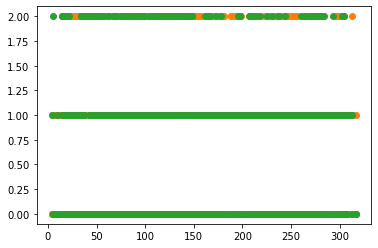

In [43]:
errs()

############################################################################################################################################
AGGIUNGENDO IL NUMERO DI VIDEO IL FIT E' MIGLIORATO ULTERIORMENTE SUL DATA SET ARRIVANDO A UN ERRORE MEDIO DEL 21%
############################################################################################################################################

In [44]:
sf = pd.read_csv(r'C:\Users\loren\Documents\GitHub\intro2ml_2021_final_project\Data\sentiment_by_sentence.csv')
print(sf)

      Unnamed: 0  anger  anticipation  disgust  fear  joy  sadness  surprise  \
0              1      0             2        0     0    0        0         0   
1              2      0             0        0     0    0        0         0   
2              3      0             2        0     0    3        0         2   
3              4      0             0        0     0    0        0         0   
4              5      0             0        0     0    0        0         0   
...          ...    ...           ...      ...   ...  ...      ...       ...   
1995        1996      0             0        0     0    0        0         0   
1996        1997      1             0        1     1    1        1         1   
1997        1998      0             0        0     0    1        0         0   
1998        1999      0             1        0     1    1        0         1   
1999        2000      0             0        0     0    0        0         0   

      trust  negative  positive  
0    

In [45]:
X = np.zeros((len(lunghezze),14),dtype=np.int32)
for i in range(len(lunghezze)):
    X[i][0]=lunghezze[i]
    X[i][1]=nhash[i]
    X[i][2]=numphoto[i]
    X[i][3]=nvideo[i]
    X[i][4]=sf["anger"][i]
    X[i][5]=sf["anticipation"][i]
    X[i][6]=sf["disgust"][i]
    X[i][7]=sf["fear"][i]
    X[i][8]=sf["joy"][i]
    X[i][9]=sf["sadness"][i]
    X[i][10]=sf["surprise"][i]
    X[i][11]=sf["trust"][i]
    X[i][12]=sf["negative"][i]
    X[i][13]=sf["positive"][i]
print(X)
regr = RandomForestClassifier(n_estimators=500,max_depth=20, random_state=0)
regr.fit(X,popular.ravel())
predpoints = np.zeros((len(lunghezze),1),dtype=np.int32)
for i in range(len(lunghezze)):
    predpoints[i] = regr.predict([[X[i][0],X[i][1],X[i][2],X[i][3],X[i][4],X[i][5],X[i][6],X[i][7],X[i][8],X[i][9],X[i][10],X[i][11],X[i][12],X[i][13]]])[0]

[[ 85   0   0 ...   0   0   0]
 [160   0   0 ...   0   0   0]
 [126   0   0 ...   2   0   3]
 ...
 [ 27   0   0 ...   1   0   2]
 [ 29   0   0 ...   1   0   1]
 [ 57   0   1 ...   0   0   0]]


[0]
89
0.0445
[0]
53
0.053
[1]
36
0.036


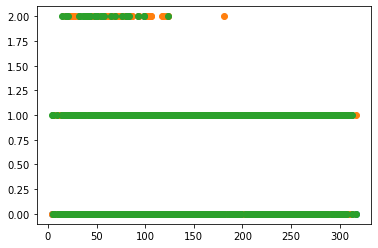

In [46]:
errs()

#####################################################################################################################################
INSERENDO LE EMOZIONI L'ERRORE SEMBRA CROLLARE AL 4.5%
#####################################################################################################################################